# 1.1 수학과 파이썬 복습

In [ ]:
import numpy as np

x = np.array([1, 2, 3])
x.__class__

numpy.ndarray

In [ ]:
x.shape

(3,)

In [ ]:
x.ndim

1

In [ ]:
W = np.array([[1,2,3], [4,5,6]])
W.shape

(2, 3)

In [ ]:
W.ndim

2

## 1.1.2 행렬의 원소별 연산

In [ ]:
W = np.array([[1,2,3], [4,5,6]])
X = np.array([[0,1,2], [3,4,5]])

In [ ]:
W+X

array([[ 1,  3,  5],
       [ 7,  9, 11]])

In [ ]:
W*X 

array([[ 0,  2,  6],
       [12, 20, 30]])

## 1.1.3 브로드캐스트

In [ ]:
A = np.array([[1,2], [3,4]])
A*10

array([[10, 20],
       [30, 40]])

In [ ]:
A = np.array([[1,2], [3,4]])
b = np.array([10,20])
A*b

array([[10, 40],
       [30, 80]])

## 1.1.4 벡터의 내적과 행렬의 곱

In [ ]:
a = np.array([1,2,3])
b = np.array([4,5,6])
np.dot(a,b)

32

In [ ]:
A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])
np.matmul(A, B)

array([[19, 22],
       [43, 50]])

# 1.2 신경망의 추론
## 1.2.1 신경망 추론 전체 그림

In [ ]:
import numpy as np
W1 = np.random.randn(2,4)
b1 = np.random.randn(4)
x = np.random.randn(10, 2)
h = np.matmul(x, W1) + b1

In [ ]:
h

array([[ 0.70584835,  1.36108775,  1.49657075, -0.4217229 ],
       [ 2.67087548,  1.57259134,  3.07200901, -1.19195422],
       [ 1.20625282,  1.41101858,  1.91735549, -0.62017228],
       [-1.31329199,  0.84865341,  1.34898226,  0.1965503 ],
       [-0.21903988,  1.67477486, -1.30511283,  0.18329317],
       [ 1.76116234,  1.84796382,  0.48165009, -0.61632786],
       [ 0.52643406,  1.53953095,  0.3668357 , -0.23535541],
       [ 1.1644573 ,  1.54352587,  1.20081192, -0.52339442],
       [-0.85925915,  0.91341245,  1.63378086,  0.02790723],
       [-1.11589139,  0.86701744,  1.52161886,  0.11748349]])

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [ ]:
a = sigmoid(h)
a

array([[0.66948315, 0.79593643, 0.81706246, 0.39610455],
       [0.93528604, 0.82815271, 0.95572326, 0.23290961],
       [0.76963526, 0.80392655, 0.87184325, 0.34974227],
       [0.2119365 , 0.70028459, 0.79396319, 0.54897999],
       [0.44545793, 0.8422114 , 0.21330579, 0.54569543],
       [0.85335518, 0.86388786, 0.61813744, 0.35061708],
       [0.62865103, 0.82339653, 0.59069415, 0.44143125],
       [0.76214169, 0.8239767 , 0.76866919, 0.37205885],
       [0.29749415, 0.71369795, 0.83668692, 0.50697636],
       [0.24677418, 0.70412471, 0.82077674, 0.52933714]])

In [ ]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.random.randn(10, 2)
W1 = np.random.randn(2, 4)
b1 = np.random.randn(4)
W2 = np.random.randn(4, 3)
b2 = np.random.randn(3)

h = np.matmul(x, W1) + b1
a = sigmoid(h)
s = np.matmul(a, W2) + b2

s


array([[-0.00828559, -3.97832499, -1.24125578],
       [ 1.02443404, -2.67291137, -0.62350323],
       [ 0.69397073, -2.47414414, -0.6536794 ],
       [ 1.15814852, -2.74105204, -0.629839  ],
       [ 1.42279448, -2.87715316, -0.51200074],
       [ 0.98433079, -3.1916547 , -0.87324518],
       [ 1.29900703, -2.71642809, -0.56906826],
       [ 0.3239439 , -2.98915896, -0.63933679],
       [-0.27214266, -3.43205312, -0.69334413],
       [ 0.82015009, -3.41852681, -0.95784849]])

In [ ]:
import numpy as np

class Sigmoid:
    def __init__(self):
        self.params = []
        
    def forward(self, x):
        return 1/(1+np.exp(-x))

class Affine:
    def __init__(self, W ,b):
        self.params = [W, b]
        
    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        return out
    
    
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)
        
        self.layers = {
            Affine(W1, b1), 
            Sigmoid(),
            Affine(W2, b2)
        }
        
        self.params = []
        for layer in self.layers:
            self.params += layer.params
            
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

In [ ]:
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)
s

array([[4.65175692e-01, 1.71022149e-02, 8.41058593e-01],
       [6.23577816e-04, 1.21198361e-03, 9.83976502e-01],
       [4.66001312e-01, 1.74487409e-02, 8.42401848e-01],
       [3.55309992e-04, 9.84748161e-04, 9.86712943e-01],
       [1.66158932e-02, 3.28693393e-03, 9.46640480e-01],
       [3.22216375e-02, 5.31270721e-03, 9.41699844e-01],
       [5.90612842e-01, 1.78609514e-02, 8.04065655e-01],
       [9.99999962e-01, 9.03384692e-01, 1.48131150e-02],
       [1.44517561e-01, 8.07163735e-03, 8.93708004e-01],
       [9.14673326e-02, 6.73990412e-03, 9.09663920e-01]])

- Repeat 노드

In [ ]:
import numpy as np

D, N = 8, 7
x = np.random.randn(1, D)
y = np.repeat(x, N, axis=0)
dy = np.random.randn(N, D)
dx = np.sum(dy, axis=0, keepdims=True)

- Sum 노드

In [ ]:
import numpy as np

D, N = 8, 7
x = np.random.randn(N, D)
y = np.sum(s, axis=0, keepdims=True)

dy = np.random.randn(1, D)
dx = np.repeat(dy, N, axis=0)

- MatMul


In [ ]:
class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None
    
    def forward(self, x):
        W, = self.params
        out = np.matmul(x, W)
        self.x = x

        return out
    
    def backward(self, dout):
        W, = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        self.grads[0][...] = dW
        
        return dx

1.3.5 기울기 도출과 역전파 구현
- sigmoid 계층
  

In [ ]:
class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None

    def forward(self, x):
        out = 1/(1+np.exp(-x))
        self.out = out
        return out
    
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx

- Affine 계층

In [ ]:
class Affine:
    def __init(self):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None
    
    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        self.x = x
        return out
    
    def backward(self, dout):
        W, b = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        db = np.sum(dout, axis=0)
        
        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx
    
    

## 1.3.6 가중치의 갱신

In [ ]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]

# 1.4 신경망으로 문제를 풀다
## 1.4.1 스파이컬 데이터셋

In [ ]:
import sys
sys.path.append('..')
from dataset import spiral
import matplotlib.pyplot as plt

x, t = spiral.load_data()
print('x', x.shape)
print('t', t.shape)

x (300, 2)
t (300, 3)


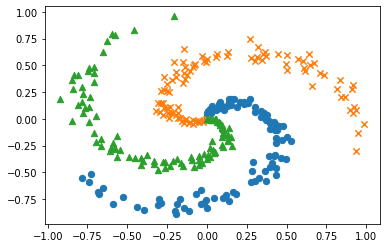

In [ ]:
N = 100
CLS_NUM = 3
markers = ["o", "x", "^"]
for i in range(CLS_NUM):
    plt.scatter(
        x[i * N : (i + 1) * N, 0], x[i * N : (i + 1) * N, 1], s=40, marker=markers[i]
    )
plt.show()

## 1.4.2 신경망 구현

In [ ]:
import sys
sys.path.append('..')
import numpy as np
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

class TwoLayerNet:
    def ___init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)
        
        self.layers = {
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        }
        self.loss_layer = SoftmaxWithLoss()
        
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
            
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss
    
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout


## 1.4.3 학습용 코드

In [ ]:
import sys
sys.path.append('..')
import numpy as np
from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt
from two_layer_net import TwoLayerNet

max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    idx = np.random.permutation(data_size)
    x=x[idx]
    t=t[idx]
    
    for iters in range(max_iter):
        batch_x = x[iters * batch_size:(iters + 1) * batch_size]
        batch_t = t[iters * batch_size:(iters + 1) * batch_size]

        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        
        total_loss += loss
        loss_count += 1
        
        if (iters + 1)%10 == 0:
            avg_loss = total_loss / loss_count
            print('| 에폭 %d | 반복 %d / %d | 손실 %.2f'
                  %(epoch+1, iters+1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0

| 에폭 1 | 반복 10 / 10 | 손실 1.13
| 에폭 2 | 반복 10 / 10 | 손실 1.13
| 에폭 3 | 반복 10 / 10 | 손실 1.12
| 에폭 4 | 반복 10 / 10 | 손실 1.12
| 에폭 5 | 반복 10 / 10 | 손실 1.11
| 에폭 6 | 반복 10 / 10 | 손실 1.14
| 에폭 7 | 반복 10 / 10 | 손실 1.16
| 에폭 8 | 반복 10 / 10 | 손실 1.11
| 에폭 9 | 반복 10 / 10 | 손실 1.12
| 에폭 10 | 반복 10 / 10 | 손실 1.13
| 에폭 11 | 반복 10 / 10 | 손실 1.12
| 에폭 12 | 반복 10 / 10 | 손실 1.11
| 에폭 13 | 반복 10 / 10 | 손실 1.09
| 에폭 14 | 반복 10 / 10 | 손실 1.08
| 에폭 15 | 반복 10 / 10 | 손실 1.04
| 에폭 16 | 반복 10 / 10 | 손실 1.03
| 에폭 17 | 반복 10 / 10 | 손실 0.96
| 에폭 18 | 반복 10 / 10 | 손실 0.92
| 에폭 19 | 반복 10 / 10 | 손실 0.92
| 에폭 20 | 반복 10 / 10 | 손실 0.87
| 에폭 21 | 반복 10 / 10 | 손실 0.85
| 에폭 22 | 반복 10 / 10 | 손실 0.82
| 에폭 23 | 반복 10 / 10 | 손실 0.79
| 에폭 24 | 반복 10 / 10 | 손실 0.78
| 에폭 25 | 반복 10 / 10 | 손실 0.82
| 에폭 26 | 반복 10 / 10 | 손실 0.78
| 에폭 27 | 반복 10 / 10 | 손실 0.76
| 에폭 28 | 반복 10 / 10 | 손실 0.76
| 에폭 29 | 반복 10 / 10 | 손실 0.78
| 에폭 30 | 반복 10 / 10 | 손실 0.75
| 에폭 31 | 반복 10 / 10 | 손실 0.78
| 에폭 32 | 반복 10 / 10 | 손실 0.77
| 에폭 33 | 반복 10 /

In [ ]:
import numpy as np
np.random.permutation(10)


array([5, 1, 8, 4, 9, 7, 0, 2, 6, 3])

 15%|█▍        | 44/300 [00:00<00:00, 435.87it/s]

| 에폭 1 | 반복10/10 | 손실 1.13
| 에폭 2 | 반복10/10 | 손실 1.13
| 에폭 3 | 반복10/10 | 손실 1.12
| 에폭 4 | 반복10/10 | 손실 1.12
| 에폭 5 | 반복10/10 | 손실 1.11
| 에폭 6 | 반복10/10 | 손실 1.14
| 에폭 7 | 반복10/10 | 손실 1.16
| 에폭 8 | 반복10/10 | 손실 1.11
| 에폭 9 | 반복10/10 | 손실 1.12
| 에폭 10 | 반복10/10 | 손실 1.13
| 에폭 11 | 반복10/10 | 손실 1.12
| 에폭 12 | 반복10/10 | 손실 1.11
| 에폭 13 | 반복10/10 | 손실 1.09
| 에폭 14 | 반복10/10 | 손실 1.08
| 에폭 15 | 반복10/10 | 손실 1.04
| 에폭 16 | 반복10/10 | 손실 1.03
| 에폭 17 | 반복10/10 | 손실 0.96
| 에폭 18 | 반복10/10 | 손실 0.92
| 에폭 19 | 반복10/10 | 손실 0.92
| 에폭 20 | 반복10/10 | 손실 0.87
| 에폭 21 | 반복10/10 | 손실 0.85
| 에폭 22 | 반복10/10 | 손실 0.82
| 에폭 23 | 반복10/10 | 손실 0.79
| 에폭 24 | 반복10/10 | 손실 0.78
| 에폭 25 | 반복10/10 | 손실 0.82
| 에폭 26 | 반복10/10 | 손실 0.78
| 에폭 27 | 반복10/10 | 손실 0.76
| 에폭 28 | 반복10/10 | 손실 0.76
| 에폭 29 | 반복10/10 | 손실 0.78
| 에폭 30 | 반복10/10 | 손실 0.75
| 에폭 31 | 반복10/10 | 손실 0.78
| 에폭 32 | 반복10/10 | 손실 0.77
| 에폭 33 | 반복10/10 | 손실 0.77
| 에폭 34 | 반복10/10 | 손실 0.78
| 에폭 35 | 반복10/10 | 손실 0.75
| 에폭 36 | 반복10/10 | 손실 0.74
|

 47%|████▋     | 142/300 [00:00<00:00, 469.91it/s]


| 에폭 88 | 반복10/10 | 손실 0.61
| 에폭 89 | 반복10/10 | 손실 0.59
| 에폭 90 | 반복10/10 | 손실 0.58
| 에폭 91 | 반복10/10 | 손실 0.56
| 에폭 92 | 반복10/10 | 손실 0.56
| 에폭 93 | 반복10/10 | 손실 0.54
| 에폭 94 | 반복10/10 | 손실 0.53
| 에폭 95 | 반복10/10 | 손실 0.53
| 에폭 96 | 반복10/10 | 손실 0.52
| 에폭 97 | 반복10/10 | 손실 0.51
| 에폭 98 | 반복10/10 | 손실 0.50
| 에폭 99 | 반복10/10 | 손실 0.48
| 에폭 100 | 반복10/10 | 손실 0.48
| 에폭 101 | 반복10/10 | 손실 0.46
| 에폭 102 | 반복10/10 | 손실 0.45
| 에폭 103 | 반복10/10 | 손실 0.45
| 에폭 104 | 반복10/10 | 손실 0.44
| 에폭 105 | 반복10/10 | 손실 0.44
| 에폭 106 | 반복10/10 | 손실 0.41
| 에폭 107 | 반복10/10 | 손실 0.40
| 에폭 108 | 반복10/10 | 손실 0.41
| 에폭 109 | 반복10/10 | 손실 0.40
| 에폭 110 | 반복10/10 | 손실 0.40
| 에폭 111 | 반복10/10 | 손실 0.38
| 에폭 112 | 반복10/10 | 손실 0.38
| 에폭 113 | 반복10/10 | 손실 0.36
| 에폭 114 | 반복10/10 | 손실 0.37
| 에폭 115 | 반복10/10 | 손실 0.35
| 에폭 116 | 반복10/10 | 손실 0.34
| 에폭 117 | 반복10/10 | 손실 0.34
| 에폭 118 | 반복10/10 | 손실 0.34
| 에폭 119 | 반복10/10 | 손실 0.33
| 에폭 120 | 반복10/10 | 손실 0.34
| 에폭 121 | 반복10/10 | 손실 0.32
| 에폭 122 | 반복10/10 | 손실 0

 80%|████████  | 241/300 [00:00<00:00, 478.60it/s]

| 에폭 177 | 반복10/10 | 손실 0.18
| 에폭 178 | 반복10/10 | 손실 0.18
| 에폭 179 | 반복10/10 | 손실 0.17
| 에폭 180 | 반복10/10 | 손실 0.17
| 에폭 181 | 반복10/10 | 손실 0.18
| 에폭 182 | 반복10/10 | 손실 0.17
| 에폭 183 | 반복10/10 | 손실 0.18
| 에폭 184 | 반복10/10 | 손실 0.17
| 에폭 185 | 반복10/10 | 손실 0.17
| 에폭 186 | 반복10/10 | 손실 0.18
| 에폭 187 | 반복10/10 | 손실 0.17
| 에폭 188 | 반복10/10 | 손실 0.17
| 에폭 189 | 반복10/10 | 손실 0.17
| 에폭 190 | 반복10/10 | 손실 0.17
| 에폭 191 | 반복10/10 | 손실 0.16
| 에폭 192 | 반복10/10 | 손실 0.17
| 에폭 193 | 반복10/10 | 손실 0.16
| 에폭 194 | 반복10/10 | 손실 0.16
| 에폭 195 | 반복10/10 | 손실 0.16
| 에폭 196 | 반복10/10 | 손실 0.16
| 에폭 197 | 반복10/10 | 손실 0.16
| 에폭 198 | 반복10/10 | 손실 0.15
| 에폭 199 | 반복10/10 | 손실 0.16
| 에폭 200 | 반복10/10 | 손실 0.16
| 에폭 201 | 반복10/10 | 손실 0.15
| 에폭 202 | 반복10/10 | 손실 0.16
| 에폭 203 | 반복10/10 | 손실 0.16
| 에폭 204 | 반복10/10 | 손실 0.15
| 에폭 205 | 반복10/10 | 손실 0.16
| 에폭 206 | 반복10/10 | 손실 0.15
| 에폭 207 | 반복10/10 | 손실 0.15
| 에폭 208 | 반복10/10 | 손실 0.15
| 에폭 209 | 반복10/10 | 손실 0.15
| 에폭 210 | 반복10/10 | 손실 0.15
| 에폭 211 | 반복1

100%|██████████| 300/300 [00:00<00:00, 473.83it/s]


| 에폭 267 | 반복10/10 | 손실 0.12
| 에폭 268 | 반복10/10 | 손실 0.12
| 에폭 269 | 반복10/10 | 손실 0.11
| 에폭 270 | 반복10/10 | 손실 0.12
| 에폭 271 | 반복10/10 | 손실 0.12
| 에폭 272 | 반복10/10 | 손실 0.12
| 에폭 273 | 반복10/10 | 손실 0.12
| 에폭 274 | 반복10/10 | 손실 0.12
| 에폭 275 | 반복10/10 | 손실 0.11
| 에폭 276 | 반복10/10 | 손실 0.12
| 에폭 277 | 반복10/10 | 손실 0.12
| 에폭 278 | 반복10/10 | 손실 0.11
| 에폭 279 | 반복10/10 | 손실 0.11
| 에폭 280 | 반복10/10 | 손실 0.11
| 에폭 281 | 반복10/10 | 손실 0.11
| 에폭 282 | 반복10/10 | 손실 0.12
| 에폭 283 | 반복10/10 | 손실 0.11
| 에폭 284 | 반복10/10 | 손실 0.11
| 에폭 285 | 반복10/10 | 손실 0.11
| 에폭 286 | 반복10/10 | 손실 0.11
| 에폭 287 | 반복10/10 | 손실 0.11
| 에폭 288 | 반복10/10 | 손실 0.12
| 에폭 289 | 반복10/10 | 손실 0.11
| 에폭 290 | 반복10/10 | 손실 0.11
| 에폭 291 | 반복10/10 | 손실 0.11
| 에폭 292 | 반복10/10 | 손실 0.11
| 에폭 293 | 반복10/10 | 손실 0.11
| 에폭 294 | 반복10/10 | 손실 0.11
| 에폭 295 | 반복10/10 | 손실 0.12
| 에폭 296 | 반복10/10 | 손실 0.11
| 에폭 297 | 반복10/10 | 손실 0.12
| 에폭 298 | 반복10/10 | 손실 0.11
| 에폭 299 | 반복10/10 | 손실 0.11
| 에폭 300 | 반복10/10 | 손실 0.11


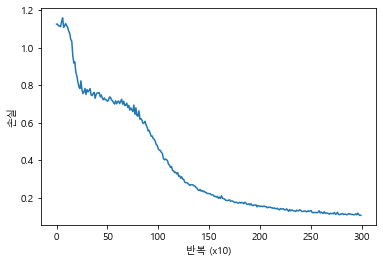

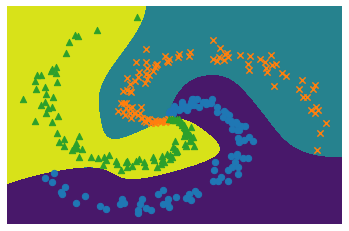

In [ ]:
# ch01/train_custom_loop.py
import sys
sys.path.append('..')
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm  # pip install tqdm
from common.optimizer import SGD
from dataset import spiral
from two_layer_net import TwoLayerNet

matplotlib.rc('font', family='Malgun Gothic')  # linux
# matplotlib.rc('font', family='AppleGothic')  # Mac

# 1. 하이퍼파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

# 2. 데이터 읽기, 모델과 옵티마이저 생성
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2,
                    hidden_size=hidden_size,
                    output_size=3)
optimizer = SGD(lr=learning_rate)

# 학습에 사용하는 변수
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in tqdm(range(max_epoch)):
    # 3. 데이터 셔플링
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]
    
    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]
        
        # 기울기를 구해 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        
        total_loss += loss
        loss_count += 1
        
        # 정기적으로 학습 경과 출력
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print(f'| 에폭 {epoch+1} | 반복{iters+1}/{max_iters} | 손실 {avg_loss:.2f}')
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0



# 학습 결과 플롯
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('반복 (x10)')
plt.ylabel('손실')
plt.show()

# 경계 영역 플롯
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

# 데이터점 플롯
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

In [1]:
import sys
sys.path.append('..')
from common.optimizer import SGD
from common.trainer import Trainer
from dataset import spiral

max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval=10)
trainer.plot()

ERROR:root:
UnicodeDecodeError while processing traceback.

ERROR:root:
UnicodeDecodeError while processing traceback.

--- Logging error ---
--- Logging error ---
--- Logging error ---
--- Logging error ---
--- Logging error ---
Error in sys.excepthook:
Traceback (most recent call last):
  File "C:\Users\user\AppData\Local\Programs\Python\Python310\lib\linecache.py", line 46, in getlines
    return updatecache(filename, module_globals)
  File "C:\Users\user\AppData\Local\Programs\Python\Python310\lib\linecache.py", line 137, in updatecache
    lines = fp.readlines()
  File "C:\Users\user\AppData\Local\Programs\Python\Python310\lib\codecs.py", line 322, in decode
    (result, consumed) = self._buffer_decode(data, self.errors, final)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 818: invalid start byte

Original exception was:
Traceback (most recent call last):
  File "C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactive

# 1.5 계산의 고속화
## 1.5.1 비트 정밀도


In [1]:
import numpy as np
a = np.random.randn(3)
a.dtype

dtype('float64')

In [2]:
b = np.random.randn(3).astype(np.float32)
b.dtype

dtype('float32')

In [4]:
c = np.random.randn(3).astype('f')
c.dtype

dtype('float32')